### Importing Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import wordcloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

### Loading Dataset

In [21]:
df = pd.read_csv('Restaurant_Reviews.tsv',sep='\t')

In [22]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [23]:
df.shape

(1000, 2)

### Cleaning the texts

##### 1. Removing Punctuations

In [24]:
stopwords_list = nltk.corpus.stopwords.words("english") # stopwords list for english
tokener = nltk.word_tokenize # to tokenize

def remove_punch(text):
    clean_words = re.sub(r"[^a-zA-Z0-9]"," ",text.lower())
    return clean_words

df.Review = df.Review.apply(remove_punch)

##### 1. Removing White Spaces

In [25]:
def remove_whitespace(text):
    cleaned_space = re.sub(' +'," ",text)
    return cleaned_space
df.Review = df.Review.apply(remove_whitespace)

##### 3. Removing Stopwords & Tokenisation

In [26]:
def remove_stopwords(text):
    tok_word = tokener(text)
    clean_words=[]
    for word in tok_word:
        if word in stopwords_list:
            continue
        else: 
            clean_words.append(word)
    words = ' '.join(clean_words)
    return words

df.Review = df.Review.apply(remove_stopwords)

##### 4. Removing digits

In [27]:
def remove_digits(text):
    clean_words = re.sub(r"[^a-zA-Z]"," ",text.lower())
    return clean_words

df.Review = df.Review.apply(remove_digits)

In [28]:
df.Review = df.Review.apply(remove_whitespace)

##### 5. Lemmatization

In [29]:
lm=nltk.WordNetLemmatizer()

def lemma(text):
    tok_word = tokener(text)
    lemma_word =[]
    # print("token :",tok_word)
    for tok in tok_word:
        lemma_tok = lm.lemmatize(tok)
        lemma_word.append(lemma_tok)
    # print("lemmatization :",lemma_word)
    final_text= " ".join(lemma_word)
    # print("Final text :",final_text)
    return final_text

df.Review = df.Review.apply(lemma)

In [30]:
df.Review

0                                        wow loved place
1                                             crust good
2                                    tasty texture nasty
3      stopped late may bank holiday rick steve recom...
4                             selection menu great price
                             ...                        
995                    think food flavor texture lacking
996                              appetite instantly gone
997                      overall impressed would go back
998    whole experience underwhelming think go ninja ...
999    wasted enough life poured salt wound drawing t...
Name: Review, Length: 1000, dtype: object

### Word Cloud

In [31]:
Positive = df[df["Liked"]==1]
Negative = df[df["Liked"]==0]

In [32]:
positive_words_cloud = wordcloud.WordCloud().generate_from_text(' '.join(Positive.Review))
negative_words_cloud = wordcloud.WordCloud().generate_from_text(' '.join(Negative.Review))

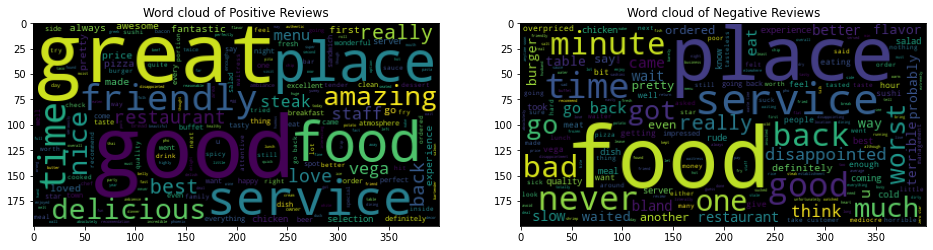

In [33]:
plt.figure(figsize=(16,12)) 
plt.subplot(121) 
plt.title("Word cloud of Positive Reviews") 
plt.imshow(positive_words_cloud) 
plt.subplot(122) 
plt.title("Word cloud of Negative Reviews") 
plt.imshow(negative_words_cloud) 

### Text Vectorisation

TF-IDF

In [34]:
tf_idf = TfidfVectorizer(ngram_range=(1,3),max_features=2500)
scaled_X_tf =  tf_idf.fit_transform(df.Review)


In [35]:
df_tfidf_sklearn = pd.DataFrame(scaled_X_tf.toarray(),columns=tf_idf.get_feature_names())
df_tfidf_sklearn.head()

/home/user/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,absolutely,absolutely amazing,acknowledged,actually,added,ago,almost,also,also taste,although,...,wow,wrap,wrong,year,year ago,yet,yum,yummy,zero,zero star
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.572716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Splitting the dataset into the Training set and Test set

In [36]:
X_train,X_test,y_train,y_test = train_test_split(df_tfidf_sklearn,df['Liked'],test_size=0.3,random_state=42)

#### Model Building

In [37]:
clf_tfidf = RandomForestClassifier()
clf_tfidf.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
clf_tfidf.score(X_train,y_train)

0.9957142857142857

In [39]:
clf_tfidf.score(X_test,y_test)

0.7633333333333333

### Predict

In [40]:

def predict_statement(sample_review):
    text = remove_punch(sample_review)
    text = remove_whitespace(text)
    text = remove_stopwords(text)
    text = remove_digits(text)
    text = remove_whitespace(text)
    text = lemma(text)
    temp = tf_idf.transform([text]).toarray()
    out = clf_tfidf.predict(temp)
    return out[0]


In [41]:
sample_review = 'Food was pretty bad and the service was very slow.'

if predict_statement(sample_review):
    print("This is a POSITIVE Review...")
else:
    print("This is a NEGATIVE Review...")

This is a NEGATIVE Review...


/home/user/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
